<a href="https://colab.research.google.com/github/Pizzawookiee/Cov2D-19-lung-xray-classifier/blob/master/Loading_Data_Setup.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

0.0 is negative, 1.0 is COVID, 2.0 is viral pneumonia, 3.0 is bacterial pneumonia, 4.0 is tuberculosis

> Indented block



In [ ]:
#connects Colab to Google Drive
from google.colab import drive
drive.mount('/content/gdrive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/gdrive


In [ ]:
#connects Colab to Kaggle
import os
os.environ['KAGGLE_CONFIG_DIR']='/content/gdrive/My Drive/covid project'
%cd /content/gdrive/My Drive/covid project

/content/gdrive/My Drive/covid project


In [ ]:
#downloads Kaggle datasets to Colab machine, therefore solving the Internet constraints I would have had if I had downloaded them to my own computer

'''
!kaggle datasets download -d plameneduardo/sarscov2-ctscan-dataset (in data)
!kaggle datasets download -d luisblanche/covidct (in data)
!kaggle datasets download -d tawsifurrahman/covid19-radiography-database (in data)
https://www.kaggle.com/praveengovi/coronahack-chest-xraydataset (1 GB))
https://www.kaggle.com/andrewmvd/mosmed-covid19-ct-scans (3 GB)
https://www.kaggle.com/kmader/pulmonary-chest-xray-abnormalities (4 GB) (in data)
'''https://www.kaggle.com/khoongweihao/covid19-xray-dataset-train-test-sets (85 MB) (too many conditions)'''
'''https://www.kaggle.com/darshan1504/covid-19-detection-xray-dataset (189 MB) (already have the data)'''
https://www.kaggle.com/paultimothymooney/chest-xray-pneumonia (1 GB) (in data)
https://www.kaggle.com/andrewmvd/pediatric-pneumonia-chest-xray (1 GB) (in data)
https://www.kaggle.com/andrewmvd/convid19-x-rays (in data)
https://www.kaggle.com/raddar/chest-xrays-tuberculosis-from-india (35 MB) (in data)
https://www.kaggle.com/prashant268/chest-xray-covid19-pneumonia (2 GB) (added COVID-19 images to data)
https://www.kaggle.com/tarandeep97/covid19-normal-posteroanteriorpa-xrays (added COVID-19 images to data)
'''
https://www.kaggle.com/nih-chest-xrays/data (42 GB)




 96% 222M/230M [00:01<00:00, 137MB/s]
100% 230M/230M [00:02<00:00, 116MB/s]


In [ ]:
!kaggle datasets download -d tarandeep97/covid19-normal-posteroanteriorpa-xrays

 99% 129M/131M [00:07<00:00, 19.3MB/s]
100% 131M/131M [00:07<00:00, 18.8MB/s]


Unzips all the zip files from Kaggle

In [ ]:
!unzip \*zip && rm *.zip

Archive:  covid19-normal-posteroanteriorpa-xrays.zip
  inflating: covid/01E392EE-69F9-4E33-BFCE-E5C968654078.jpeg  
  inflating: covid/03BF7561-A9BA-4C3C-B8A0-D3E585F73F3C.jpeg  
  inflating: covid/1-s2.0-S0140673620303706-fx1_lrg.jpg  
  inflating: covid/1-s2.0-S1684118220300608-main.pdf-001.jpg  
  inflating: covid/1-s2.0-S1684118220300608-main.pdf-002.jpg  
  inflating: covid/1-s2.0-S1684118220300682-main.pdf-002-a1.png  
  inflating: covid/1-s2.0-S1684118220300682-main.pdf-002-a2.png  
  inflating: covid/1-s2.0-S1684118220300682-main.pdf-003-b1.png  
  inflating: covid/1-s2.0-S1684118220300682-main.pdf-003-b2.png  
  inflating: covid/1.CXRCTThoraximagesofCOVID-19fromSingapore.pdf-000-fig1a.png  
  inflating: covid/1.CXRCTThoraximagesofCOVID-19fromSingapore.pdf-000-fig1b.png  
  inflating: covid/1.CXRCTThoraximagesofCOVID-19fromSingapore.pdf-001-fig2a.png  
  inflating: covid/1.CXRCTThoraximagesofCOVID-19fromSingapore.pdf-001-fig2b.png  
  inflating: covid/1.CXRCTThoraximagesofCOVID

/content/gdrive/My Drive/covid project
/content/gdrive/My Drive/covid project


Important libraries

In [ ]:
# File manipulation and IO (input/output)
import os, shutil
import pickle
import zipfile
from google.colab import files

# Import numerical and dataframe handling
import numpy as np
import scipy
import pandas as pd

# Data preprocessing
from PIL import Image
from sklearn.utils import shuffle

# Model scoring
from sklearn.metrics import confusion_matrix
from sklearn import metrics

# Import standard machine learning machinery
import tensorflow as tf

# Garbage collection (for saving RAM during training)
import gc

# For plotting
import matplotlib.pyplot as plt
import matplotlib.cm as cm
from matplotlib.ticker import MultipleLocator
import matplotlib
import skimage.transform as transform

import tensorflow as tf

In [ ]:
del directory
del images

Some of the code used for creating directories for the images under Google Drive

In [ ]:
'''
images = '/content/gdrive/My Drive/covid project/chest_xray/val'
os.chdir(images)

normal = os.path.join(images, 'normal')
bac_p = os.path.join(images, 'bac_p')
vir_p = os.path.join(images, 'vir_p')
os.mkdir(normal)
os.mkdir(bac_p)
os.mkdir(vir_p)
'''

Some of the code used to copy images into the directories for training the model. Since each dataset was different (in what data it contained as well as file naming conventions and file organization), the cell below was altered for each dataset used.

In [ ]:
'''

directory = '/content/gdrive/My Drive/covid project/Xray_images'
NORMAL = os.path.join(directory, 'NORMAL')
VIRAL_PNEUMONIA = os.path.join(directory, 'VIRAL PNEUMONIA')
BACTERIAL_PNEUMONIA = os.path.join(directory, 'BACTERIAL PNEUMONIA')

img_directory = '/content/gdrive/My Drive/covid project/Pediatric Chest X-ray Pneumonia/train'
os.chdir(img_directory)
for _, sub_dir,_ in os.walk(img_directory):
  for sub in sub_dir:
    if sub == 'NORMAL':
      for image in os.listdir(sub):
        shutil.copy(os.path.join(sub, image), NORMAL)
    else:
      for image in os.listdir(sub):
        if "bacteria" in image:
          shutil.copy(os.path.join(sub, image), BACTERIAL_PNEUMONIA)
        else:
          shutil.copy(os.path.join(sub, image), VIRAL_PNEUMONIA)


directory = '/content/gdrive/My Drive/covid project/Xray_images'
NORMAL = os.path.join(directory, 'NORMAL')
TUBERCULOSIS = os.path.join(directory, 'TUBERCULOSIS')
img_directory = '/content/gdrive/My Drive/covid project/images/images'
os.chdir(img_directory)
for image in os.listdir(img_directory):
  if 'nx' in image:
    shutil.copy(os.path.join(img_directory, image), NORMAL)
  else:
    shutil.copy(os.path.join(img_directory, image), TUBERCULOSIS)

#os.chdir('content/gdrive/My Drive/covid project')
source = '/content/gdrive/My Drive/covid project/Lolol'
target = '/content/gdrive/My Drive/covid project/Abcd'

#os.chdir(source)
for img in os.listdir(source):
  shutil.copy (os.path.join(source,img), target)
'''

Matches newly created variables to Google Drive folders

In [ ]:
directory = '/content/gdrive/My Drive/covid project/Xray_images'
NORMAL = os.path.join(directory, 'NORMAL')
VIRAL_PNEUMONIA = os.path.join(directory, 'VIRAL PNEUMONIA')
BACTERIAL_PNEUMONIA = os.path.join(directory, 'BACTERIAL PNEUMONIA')

In [ ]:
directory = '/content/gdrive/My Drive/covid project/Xray_images'
os.chdir(directory)
test_set = os.path.join(directory, 'test_set')
os.mkdir(test_set)

Splits images into train and test

In [ ]:
#SPLITTING INTO TRAIN AND TEST (DO THIS AFTER COLLECTING ALL IMAGES) (DONE)
'''

start = '/content/gdrive/My Drive/covid project/Xray_images'
target = '/content/gdrive/My Drive/covid project/Xray_images_val'

test_size = 0.2

classes=['1 - NORMAL', '2 - COVID-19', '3 - BACTERIAL PNEUMONIA', '4 - VIRAL PNEUMONIA', '5 - TUBERCULOSIS']

for i in range(len(classes)):
  source_dir = os.path.join(start, classes[i])
  target_dir = os.path.join(target, classes[i])
  os.chdir(source_dir)

  test_set = os.listdir(source_dir)[0:int(0.2*len(os.listdir(source_dir)))]
  for image in test_set:
    shutil.move(image, target_dir)

#ensures that everything worked out okay  

directory = '/content/gdrive/My Drive/covid project/Xray_images_val'
os.chdir(directory)
for _,subdirs,_ in os.walk(directory):
  for subdir in subdirs:
    print (str(subdir) + ' size is ' + str(len(os.listdir(subdir))))

'''

1 - NORMAL size is 545
2 - COVID-19 size is 35
5 - TUBERCULOSIS size is 66
4 - VIRAL PNEUMONIA size is 454
3 - BACTERIAL PNEUMONIA size is 444


Model Training Pipeline (also seen in 'Model Training Pipeline' Colab file)

In [ ]:
image_height = 256
image_width = 256
seed = 999

one_hot_to_string = [([1.,0.,0.,0.,0.],'NORMAL'),
                    ([0.,1.,0.,0.,0.],'COVID-19'),
                    ([0.,0.,1.,0.,0.],'BACTERIAL PNEUMONIA'),
                    ([0.,0.,0.,1.,0.],'VIRAL PNEUMONIA'),
                    ([0.,0.,0.,0.,1.],'TUBERCULOSIS')]

base_dir = '/content/gdrive/My Drive/covid project'
Xray_train_dir = os.path.join(base_dir, 'Xray_images')
Xray_val_dir = os.path.join(base_dir, 'Xray_images_val')
Xray_test_dir = os.path.join(base_dir, 'Xray_images_test')

CT_dir = os.path.join(base_dir, 'CT_images') #we considered CT scans but ultimately discarded them due to time constraints

#The ImageDataGenerator function drastically reduced traning times.

train_augmented = tf.keras.preprocessing.image.ImageDataGenerator(rescale=1./255,
                                                                rotation_range=45,
                                                                width_shift_range=.15,
                                                                height_shift_range=.15,
                                                                horizontal_flip=True,
                                                                zoom_range=0.5,
                                                                samplewise_std_normalization=True)
                                                                

val_generator = tf.keras.preprocessing.image.ImageDataGenerator(rescale=1./255,
                                                                samplewise_std_normalization=True)

print('Xray image info (train, val, test):')
train_xray = train_augmented.flow_from_directory(Xray_train_dir, target_size=(image_height, image_width), color_mode='rgb', seed=seed)
val_xray = val_generator.flow_from_directory(Xray_val_dir, target_size=(image_height, image_width), color_mode='rgb', seed=seed)
test_xray = val_generator.flow_from_directory(Xray_test_dir, target_size=(image_height, image_width), color_mode='rgb', seed=seed)

ct_scan = tf.keras.preprocessing.image.ImageDataGenerator(rescale=1./255,
                                                          rotation_range=45,
                                                          width_shift_range=.15,
                                                          height_shift_range=.15,
                                                          horizontal_flip=True,
                                                          zoom_range=0.5,
                                                          samplewise_std_normalization=True,
                                                          validation_split=0.2)

print('CT image info:')
train_CT = ct_scan.flow_from_directory(CT_dir, target_size=(image_height, image_width), color_mode='rgb', seed=seed, subset='training')
val_CT = ct_scan.flow_from_directory(CT_dir, target_size=(image_height, image_width), color_mode='rgb', seed=seed, subset='validation')

/usr/local/lib/python3.6/dist-packages/keras_preprocessing/image/image_data_generator.py:356: UserWarning: This ImageDataGenerator specifies `samplewise_std_normalization`, which overrides setting of `samplewise_center`.
  warnings.warn('This ImageDataGenerator specifies '


Xray image info (train, val, test):
Found 6185 images belonging to 5 classes.
Found 1543 images belonging to 5 classes.
Found 1930 images belonging to 5 classes.
CT image info:
Found 2146 images belonging to 2 classes.
Found 535 images belonging to 2 classes.


This cell loads a few images just to make sure everything copied over okay. After running this cell, rerun the above cell to reset the order of the dataset (this ensures consistency when training models).

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


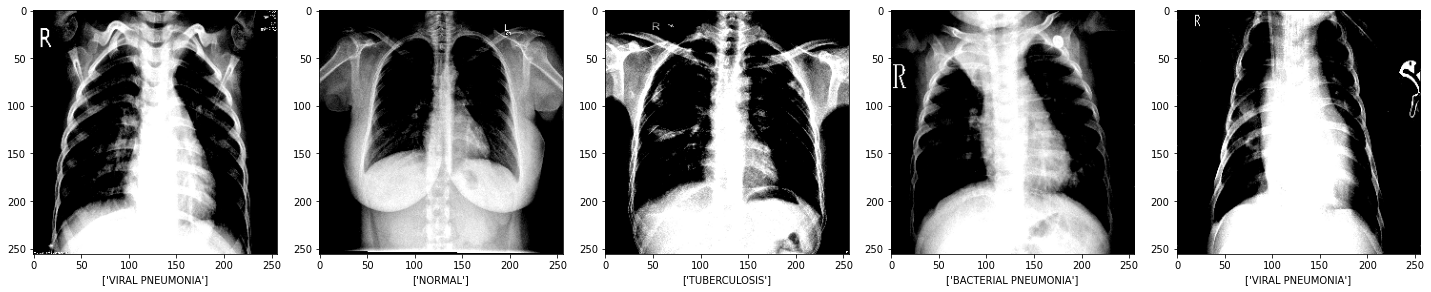

In [ ]:
samples, labels = next(val_xray)

five_samples = samples[:5]
five_labels = labels[:5]

fig, axes=plt.subplots(1,5,figsize=(20,20))
axes=axes.flatten()
for num, (img, ax) in enumerate(zip(five_samples, axes)):
  ax.imshow(img)
  one_hot = five_labels[num]
  ax.set_xlabel([y for x,y in one_hot_to_string if x == list(one_hot)])
plt.tight_layout()
plt.show()

In [ ]:
train_xray.shape

AttributeError: ignored

In [ ]:
from sklearn.model_selection import train_test_split

#X_train, X_val, y_train, y_val = train_test_split (train_xray, stratify=train_xray)
train_xray.iloc[...,-1]

AttributeError: ignored

An attempt at a hand-crafted model (we discarded them in favor of DenseNet-201)

In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Conv2D, Flatten, Dropout, MaxPooling2D

tf.keras.backend.clear_session()

model = Sequential()
model.add(Conv2D(16, 3, padding='same', activation='relu', input_shape=(image_height, image_width, 3)))
model.add(MaxPooling2D())
model.add(Conv2D(32, 3, padding='same', activation='relu'))
model.add(MaxPooling2D())
model.add(Conv2D(64, 3, padding='same', activation='relu'))
model.add(Flatten())
model.add(Dense(512, activation='relu'))
model.add(Dense(5, activation='softmax'))

model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 256, 256, 16)      448       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 128, 128, 16)      0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 128, 128, 32)      4640      
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 64, 64, 32)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 64, 64, 64)        18496     
_________________________________________________________________
flatten (Flatten)            (None, 262144)            0         
_________________________________________________________________
dense (Dense)                (None, 512)               1

In [ ]:
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

In [ ]:
history = model.fit(train_xray, epochs=10, validation_data=val_xray)

Epoch 1/10
  7/242 [..............................] - ETA: 23:54 - loss: 28.0426 - accuracy: 0.2589

KeyboardInterrupt: ignored